In [126]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [127]:
df_sizing = pd.read_csv('./datasets/sizing_datasets.csv')

df_sizing.head()


,Size,Waist,Hip,Thigh,Leg openings,Fit,Gender
0,28,29.0,35.5,20.0,13.25,Skinny,M
1,30,31.0,37.5,21.0,13.75,Skinny,M
2,32,33.0,39.5,22.0,14.25,Skinny,M
3,34,35.0,41.5,23.0,14.75,Skinny,M
4,36,37.0,43.5,24.0,15.25,Skinny,M


In [128]:
df_sizing_male = df_sizing[df_sizing['Gender']=='M']
df_sizing_female = df_sizing[df_sizing['Gender']=='F']

In [129]:
# Female prediction 
X= df_sizing_female[['Waist']]
y= df_sizing_female[['Hip']]


In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=43)


In [131]:
model= LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [132]:
model.coef_

array([[0.92503111]])

In [133]:
y_pred = model.predict(X_test)

In [134]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 score: ', r2_score(y_test, y_pred))

MAE:  2.0871299267487173
MSE:  6.049622281969816
RMSE:  2.459597991942955
R2 score:  0.7467120343117579


In [135]:
df_jeans = pd.read_csv('./datasets/jeans_measurements.csv')

df_jeans = df_jeans[['waist', 'hip','gender','fit']]
df_jeans= df_jeans.rename(columns={'waist':'Waist','hip':'Hip','gender':'Gender'})
df_jeans.head()

/var/folders/1n/jx1cq0bx301bmmtgw78690fm0000gn/T/ipykernel_47716/3600117276.py:1: DtypeWarning: Columns (40,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df_jeans = pd.read_csv('./datasets/jeans_measurements.csv')


,Waist,Hip,Gender,fit
0,33.25,40.50,M,Slim
1,33.75,42.00,M,Slim
2,32.25,40.75,M,Slim
3,33.00,42.25,M,Bootcut
4,31.25,39.00,M,Straight


In [136]:
# Separate based on gender and remove Nan
df_jeans = df_jeans.dropna()
df_jeans_female = df_jeans[df_jeans['Gender']=='W']

df_jeans_female.count()

# Predict hip size based on waist size

X_new = df_jeans_female[['Waist']]
df_jeans_female[['Predicted_Hip_Size']] = model.predict(X_new)


/var/folders/1n/jx1cq0bx301bmmtgw78690fm0000gn/T/ipykernel_47716/1054306437.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jeans_female[['Predicted_Hip_Size']] = model.predict(X_new)


In [137]:
df_jeans_female.groupby('fit').describe().transpose()

fit                            Baggy      Bootcut  Boyfriend     Jogger  \
Waist              count  129.000000  2474.000000  31.000000  13.000000   
                   mean    32.250000    30.693108  31.379032  28.980769   
                   std      1.466088     1.917111   2.140747   2.737589   
                   min     26.500000    25.500000  27.000000  26.000000   
                   25%     31.250000    29.250000  29.375000  27.500000   
                   50%     32.500000    30.750000  32.250000  28.500000   
                   75%     33.500000    32.000000  33.250000  29.000000   
                   max     33.750000    35.000000  33.750000  34.750000   
Hip                count  129.000000  2474.000000  31.000000  13.000000   
                   mean    45.819767    36.945331  39.919355  38.807692   
                   std      2.599011     2.724070   3.883934   3.385253   
                   min     38.750000    29.750000  31.500000  33.000000   
                   25%     44.250000    35.000000  37.875000  36.500000   
                   50%     46.000000    36.750000  39.250000  39.250000   
                   75%     48.000000    38.750000  42.500000  41.250000   
                   max     51.750000    47.750000  47.500000  44.250000   
Predicted_Hip_Size count  129.000000  2474.000000  31.000000  13.000000   
                   mean    38.405281    36.965108  37.599609  35.381141   
                   std      1.356177     1.773388   1.980257   2.532355   
                   min     33.086352    32.161321  33.548868  32.623837   
                   25%     37.480250    35.630188  35.745817  34.011383   
                   50%     38.636539    37.017734  38.405281  34.936414   
                   75%     39.561570    38.174023  39.330312  35.398930   
                   max     39.792828    40.949117  39.792828  40.717859   

fit                          Mom Fit      Skinny         Slim     Straight  \
Waist              count  461.000000  638.000000  1549.000000  1549.000000   
                   mean    29.928959   30.638950    30.973499    31.337314   
                   std      2.323666    2.219757     2.061203     1.936888   
                   min     25.000000   25.000000    25.000000    25.250000   
                   25%     28.250000   28.750000    29.500000    30.000000   
                   50%     29.750000   30.875000    31.000000    31.500000   
                   75%     31.750000   32.500000    32.750000    33.000000   
                   max     33.750000   35.500000    35.500000    35.750000   
Hip                count  461.000000  638.000000  1549.000000  1549.000000   
                   mean    42.831779   35.936912    38.734829    39.811007   
                   std      3.334114    2.518580     3.401604     3.058021   
                   min     33.000000   29.000000    28.250000    17.500000   
                   25%     40.250000   34.062500    36.250000    37.750000   
                   50%     42.750000   36.000000    38.500000    39.750000   
                   75%     45.000000   37.750000    41.000000    42.000000   
                   max     52.750000   44.250000    50.250000    49.250000   
Predicted_Hip_Size count  461.000000  638.000000  1549.000000  1549.000000   
                   mean    36.258246   36.915010    37.224478    37.561018   
                   std      2.149464    2.053345     1.906676     1.791682   
                   min     31.698806   31.698806    31.698806    31.930063   
                   25%     34.705157   35.167672    35.861446    36.323961   
                   50%     36.092703   37.133363    37.248992    37.711508   
                   75%     37.942765   38.636539    38.867797    39.099054   
                   max     39.792828   41.411632    41.411632    41.642890   

fit                       Wide Legged  
Waist              count    86.000000  
                   mean     30.994767  
                   std       2.464334  
             

<Axes: xlabel='Waist', ylabel='Hip'>

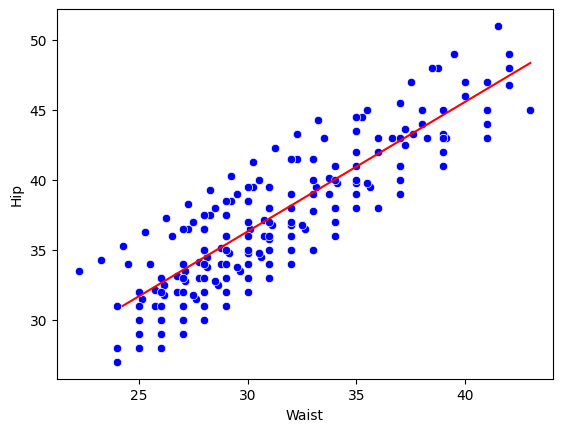

In [138]:
# Scatter plot hip and waist size
sns.scatterplot(data=df_sizing_female, x='Waist', y='Hip', color='blue')
# Regression line
sns.lineplot(
    x=X_test['Waist'],
    y=y_pred.flatten(),
    color='red'
)

In [139]:
# Work with original fit data
df_men_of = df_sizing_male[df_sizing_male['Fit']=="Original Fit"]
df_men_of['Hip2Waist']= df_men_of['Hip']/df_men_of['Waist']

df_men_of.head()

/var/folders/1n/jx1cq0bx301bmmtgw78690fm0000gn/T/ipykernel_47716/2584443456.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_men_of['Hip2Waist']= df_men_of['Hip']/df_men_of['Waist']


,Size,Waist,Hip,Thigh,Leg openings,Fit,Gender,Hip2Waist
83,28,29.5,38.75,21.0,14.50,Original Fit,M,1.313559
84,30,31.5,40.75,22.0,15.25,Original Fit,M,1.293651
85,32,33.5,42.75,23.0,16.00,Original Fit,M,1.276119
86,34,35.5,44.75,24.0,16.75,Original Fit,M,1.260563
87,36,37.5,46.75,25.0,17.50,Original Fit,M,1.246667


<Axes: xlabel='Waist', ylabel='Hip'>

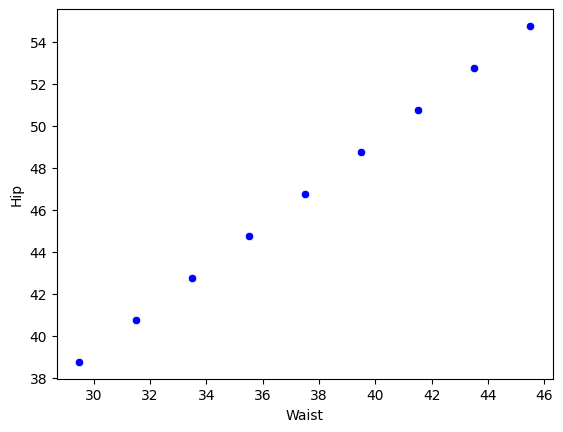

In [140]:
sns.scatterplot(
    data=df_men_of,
    x='Waist',
    y='Hip',
    color='blue'
)

In [141]:
# do a linear regression and find the slope and intercept
y_of= df_men_of[['Hip']]
X_of= df_men_of[['Waist']]





In [142]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_of,y_of,random_state=11,test_size=0.2)

In [143]:
model= LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [144]:
# Slope and intercept
print(model.coef_)
print(model.intercept_)

y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 score: ', r2_score(y_test, y_pred))

[[1.]]
[9.25]
MAE:  0.0
MSE:  0.0
RMSE:  0.0
R2 score:  1.0


<Axes: xlabel='Waist', ylabel='Hip'>

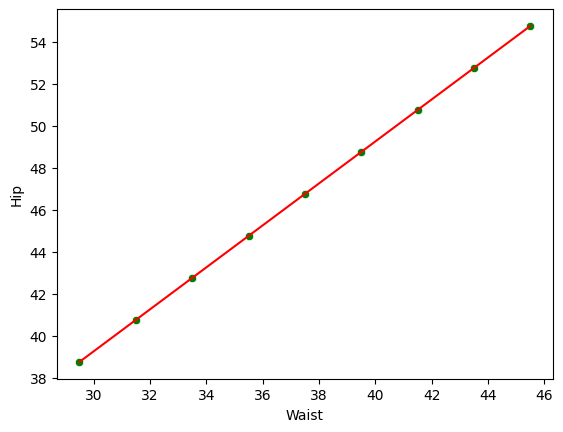

In [145]:
# Scatter plot hip and waist size
sns.scatterplot(
    data=df_men_of,
    x='Waist',
    y='Hip',
    color='green'
)
# Regression line
sns.lineplot(
    x=X_of['Waist'],
    y=model.predict(X_of).flatten(),
    color='red'
)

In [164]:
def body_waist(garment_waist:float, give:float)->float:
    return garment_waist-give

def body_hip_calc_for_straight_fit(body_waist:float,hip_const:float)->float:
    # only for Original Fit
    # 9.25 is the intercept of the linear regression
    return body_waist + hip_const

In [166]:
df_jeans = pd.read_csv('./datasets/jeans_measurements.csv')

df_jeans_men = df_jeans[df_jeans['gender']=='M']

df_jeans_men.head()

/var/folders/1n/jx1cq0bx301bmmtgw78690fm0000gn/T/ipykernel_47716/2437187973.py:1: DtypeWarning: Columns (40,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df_jeans = pd.read_csv('./datasets/jeans_measurements.csv')


,id,ean_no,gender,collection,cat,style_no,pocket_bag_print,waist_band_print,pocket_arquette,closure,...,washcarePrint_date,washcare_username,barcode_print,barcode_username,barcode_print_date,remarks,barcode_no,description,created_at,updated_at
0,1,9111001018005,M,TP,BO,UNTPMBO1018005,No,No,Yes,Zipper,...,2023-09-16 04:51:18,washcare_print,YES,pooja@un,2023-08-28 06:34:26,NaN,NaN,Men's black jeans that sit comfortably at the ...,2023-04-19 07:28:17,2023-04-19 09:09:29
1,2,9111001020019,M,TP,BO,UNTPMBO1020019,No,No,Yes,Zipper,...,2023-07-05 09:43:04,washcare_print,YES,pooja@un,2023-08-24 11:08:49,NaN,NaN,Men's light indigo jeans that sit low on waist...,2023-04-19 07:32:37,2023-04-19 09:27:36
2,3,9111001018077,M,TP,BO,UNTPMBO1018077,No,No,No,Zipper,...,2023-05-03 08:05:37,NaN,NaN,NaN,NaN,NaN,NaN,Men's mid indigo jeans that sit comfortably at...,2023-04-19 07:36:50,2023-04-19 09:30:24
3,4,9111001019055,M,TP,BO,UNTPMBO1019055,Yes,No,Yes,Zipper,...,2023-05-03 08:54:38,NaN,YES,pooja@un,2023-08-24 10:15:50,NaN,NaN,Men's mid indigo jeans that sit comfortably at...,2023-04-19 07:39:37,2023-04-19 09:32:20
4,5,9111001019003,M,TP,BO,UNTPMBO1019003,Yes,Yes,No,Zipper,...,2023-05-03 07:14:05,NaN,NaN,NaN,NaN,NaN,NaN,Men's dark indigo jeans that sit comfortably a...,2023-04-19 07:42:47,2023-04-19 09:33:52


In [180]:
# Required columns for our analysis is hip, waist, fit
df_jeans_men_required = df_jeans_men[['waist', 'hip','fit','un_waist']]
df_jeans_men_required.head()

,waist,hip,fit,un_waist
0,33.25,40.50,Slim,33.0
1,33.75,42.00,Slim,33.0
2,32.25,40.75,Slim,32.0
3,33.00,42.25,Bootcut,33.0
4,31.25,39.00,Straight,31.0


In [181]:
# Work with Original Fit which we are assuming is the same as Straight Fit
df_jeans_men_straight_fit = df_jeans_men_required[df_jeans_men_required['fit']=='Straight']

df_jeans_men_straight_fit = df_jeans_men_straight_fit.rename(columns={'waist':'Garment_Waist','hip':'Garment_Hip'})


# drop Null or NaN values
df_jeans_men_straight_fit.dropna(inplace=True)
df_jeans_men_straight_fit.count()



Garment_Waist    1058
Garment_Hip      1058
fit              1058
un_waist         1058
dtype: int64

In [182]:
waist = df_jeans_men_straight_fit['Garment_Waist'].map(lambda x: body_waist(x, 0.75))
hip= waist.map(lambda x: body_hip_calc_for_straight_fit(x,9.25))
df_jeans_men_straight_fit['Body_Waist'] = waist
df_jeans_men_straight_fit['Body_Hip'] = hip
df_jeans_men_straight_fit.head()

,Garment_Waist,Garment_Hip,fit,un_waist,Body_Waist,Body_Hip
4,31.25,39.00,Straight,31.0,30.50,39.75
7,33.00,41.75,Straight,33.0,32.25,41.50
8,32.50,41.25,Straight,32.0,31.75,41.00
9,33.75,42.00,Straight,33.0,33.00,42.25
21,31.75,41.00,Straight,31.0,31.00,40.25


In [183]:
df_jeans_men_straight_fit.describe()

,Garment_Waist,Garment_Hip,un_waist,Body_Waist,Body_Hip
count,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000
mean,34.387996,43.788043,34.042533,33.637996,42.887996
std,1.809873,2.730899,1.791150,1.809873,1.809873
min,28.000000,24.250000,28.000000,27.250000,36.500000
25%,33.250000,42.000000,33.000000,32.500000,41.750000
50%,34.750000,44.000000,34.000000,34.000000,43.250000
75%,36.000000,45.750000,36.000000,35.250000,44.500000
max,36.750000,53.000000,36.000000,36.000000,45.250000


In [184]:
# Create a Linear regression model that takes body waist and body hip and predicts size from 
# the levis data
y= df_men_of[['Size']]
X= df_men_of[['Waist','Hip']]

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=11,test_size=0.1)

In [185]:
model= LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [186]:
print(model.coef_)
print(model.intercept_)

[[0.5 0.5]]
[-6.125]


In [187]:
y_pred = model.predict(X_test)

df_men_of.loc[:,'Predicted_Size'] = model.predict(X)

df_men_of.loc[:,'Difference'] = df_men_of['Size']-df_men_of['Predicted_Size']

df_men_of.head()


,Size,Waist,Hip,Thigh,Leg openings,Fit,Gender,Hip2Waist,Predicted_Size,Difference
83,28,29.5,38.75,21.0,14.50,Original Fit,M,1.313559,28.0,0.0
84,30,31.5,40.75,22.0,15.25,Original Fit,M,1.293651,30.0,0.0
85,32,33.5,42.75,23.0,16.00,Original Fit,M,1.276119,32.0,0.0
86,34,35.5,44.75,24.0,16.75,Original Fit,M,1.260563,34.0,0.0
87,36,37.5,46.75,25.0,17.50,Original Fit,M,1.246667,36.0,0.0


In [188]:
df_jeans_men_straight_fit = df_jeans_men_straight_fit.rename(columns={'Body_Waist':'Waist','Body_Hip':'Hip'})
df_jeans_men_straight_fit.head()


,Garment_Waist,Garment_Hip,fit,un_waist,Waist,Hip
4,31.25,39.00,Straight,31.0,30.50,39.75
7,33.00,41.75,Straight,33.0,32.25,41.50
8,32.50,41.25,Straight,32.0,31.75,41.00
9,33.75,42.00,Straight,33.0,33.00,42.25
21,31.75,41.00,Straight,31.0,31.00,40.25


In [189]:
# Predict size based on body waist and body hip
X_data = df_jeans_men_straight_fit[['Waist','Hip']]

# Predicted size
df_jeans_men_straight_fit.loc[:,'Predicted_Size'] = model.predict(X_data)

In [190]:
df_jeans_men_straight_fit.head()


,Garment_Waist,Garment_Hip,fit,un_waist,Waist,Hip,Predicted_Size
4,31.25,39.00,Straight,31.0,30.50,39.75,29.00
7,33.00,41.75,Straight,33.0,32.25,41.50,30.75
8,32.50,41.25,Straight,32.0,31.75,41.00,30.25
9,33.75,42.00,Straight,33.0,33.00,42.25,31.50
21,31.75,41.00,Straight,31.0,31.00,40.25,29.50


In [191]:
# difference between predicted size and un_waist
df_jeans_men_straight_fit.loc[:,'Size difference']= df_jeans_men_straight_fit.loc[:,'un_waist']-df_jeans_men_straight_fit.loc[:,'Predicted_Size']

df_jeans_men_straight_fit.head()

,Garment_Waist,Garment_Hip,fit,un_waist,Waist,Hip,Predicted_Size,Size difference
4,31.25,39.00,Straight,31.0,30.50,39.75,29.00,2.00
7,33.00,41.75,Straight,33.0,32.25,41.50,30.75,2.25
8,32.50,41.25,Straight,32.0,31.75,41.00,30.25,1.75
9,33.75,42.00,Straight,33.0,33.00,42.25,31.50,1.50
21,31.75,41.00,Straight,31.0,31.00,40.25,29.50,1.50


In [192]:
df_jeans_men_straight_fit.describe()

,Garment_Waist,Garment_Hip,un_waist,Waist,Hip,Predicted_Size,Size difference
count,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000
mean,34.387996,43.788043,34.042533,33.637996,42.887996,32.137996,1.904537
std,1.809873,2.730899,1.791150,1.809873,1.809873,1.809873,0.286661
min,28.000000,24.250000,28.000000,27.250000,36.500000,25.750000,1.500000
25%,33.250000,42.000000,33.000000,32.500000,41.750000,31.000000,1.750000
50%,34.750000,44.000000,34.000000,34.000000,43.250000,32.500000,2.000000
75%,36.000000,45.750000,36.000000,35.250000,44.500000,33.750000,2.250000
max,36.750000,53.000000,36.000000,36.000000,45.250000,34.500000,2.250000


In [193]:
# Linear Regression using statsmodels

X_sm = df_men_of[['Waist','Hip']]
X_sm = sm.add_constant(X_sm)
y_sm = df_men_of[['Size']]
model_sm = sm.OLS(y_sm,X_sm)
results = model_sm.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                   Size   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.221e+28
Date:                Wed, 25 Oct 2023   Prob (F-statistic):           4.41e-98
Time:                        16:09:19   Log-Likelihood:                 259.09
No. Observations:                   9   AIC:                            -514.2
Df Residuals:                       7   BIC:                            -513.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1399    5.4e-15  -2.59e+13      0.0

/Users/ujjwaljayswal/Desktop/Data Analyst/notebooks/env/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
